# imports

In [15]:
import pandas as pd 
import numpy as np 
from matplotlib import pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split, cross_val_score
plt.rcParams["figure.figsize"] = (15,7)


In [4]:
df = pd.read_csv('insurance.csv')

# data 

In [5]:
df

,Пол,Возраст,Зарплата,Члены семьи,Страховые выплаты
0,1,41.0,49600.0,1,0
1,0,46.0,38000.0,1,1
2,0,29.0,21000.0,0,0
3,0,21.0,41700.0,2,0
4,1,28.0,26100.0,0,0
...,...,...,...,...,...
4995,0,28.0,35700.0,2,0
4996,0,34.0,52400.0,1,0
4997,0,20.0,33900.0,2,0
4998,1,22.0,32700.0,3,0


In [6]:
df.describe()

,Пол,Возраст,Зарплата,Члены семьи,Страховые выплаты
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000
mean,0.499000,30.952800,39916.360000,1.194200,0.148000
std,0.500049,8.440807,9900.083569,1.091387,0.463183
min,0.000000,18.000000,5300.000000,0.000000,0.000000
25%,0.000000,24.000000,33300.000000,0.000000,0.000000
50%,0.000000,30.000000,40200.000000,1.000000,0.000000
75%,1.000000,37.000000,46600.000000,2.000000,0.000000
max,1.000000,65.000000,79000.000000,6.000000,5.000000


<Figure size 720x720 with 0 Axes>

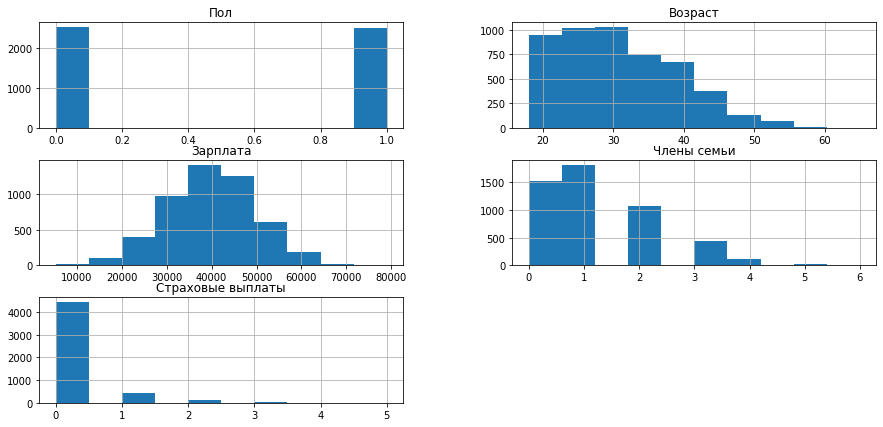

In [16]:
plt.figure(figsize=(10,10))
df.hist()
plt.show()

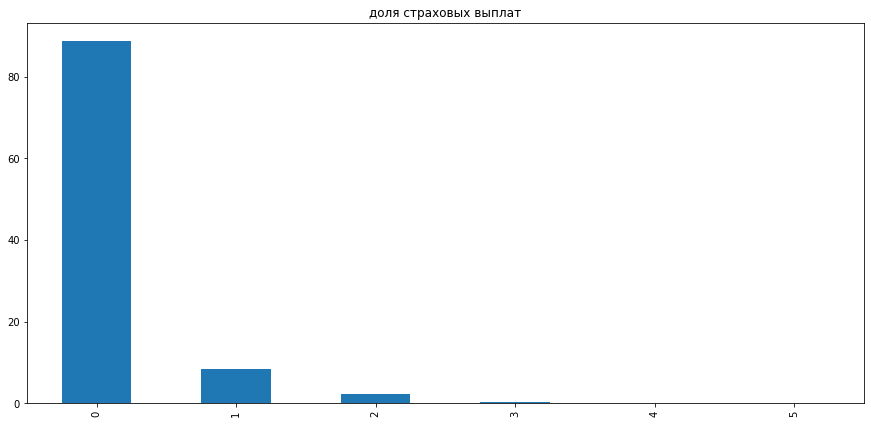

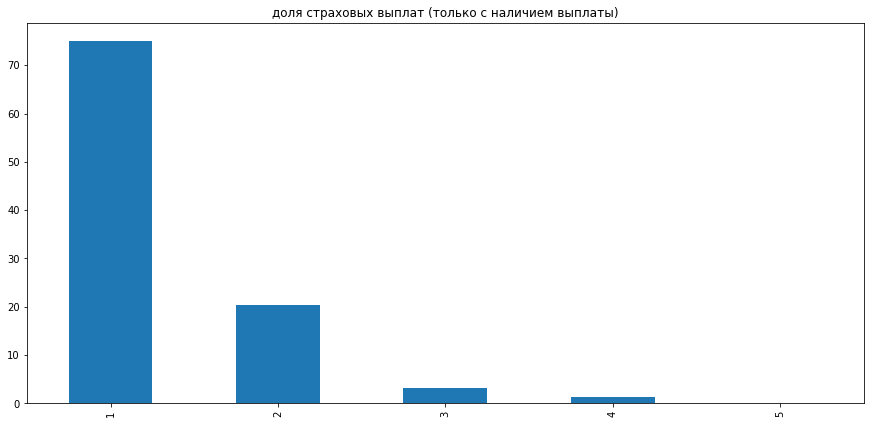

In [23]:
plt.title('доля страховых выплат')
(df['Страховые выплаты'].value_counts(normalize=True)*100).plot(kind = 'bar')
plt.show()

plt.title('доля страховых выплат (только с наличием выплаты)')
(df[df['Страховые выплаты'] > 0]['Страховые выплаты'].value_counts(normalize=True)*100).plot(kind = 'bar')
plt.show()

In [24]:
print(df.duplicated().sum(), 'полных дублей') 
df.drop_duplicates(inplace=True)

153 полных дублей


In [25]:
df.isnull().sum()

Пол                  0
Возраст              0
Зарплата             0
Члены семьи          0
Страховые выплаты    0
dtype: int64

не очень большой датасет, есть малое количество дублей, их числом можно принебречь, хотя, учитывая специфику данных, совпадения возможны. 
чаще всего выплат нет совсем, если и наступает случай выплаты, то по большей части всего один раз. 

пропусков нет совсем. 

зарплата с нормальным распределением, а вот возраст смещен в сторону молодых. 

# влияние матричного умножения на результаты модели

В широком смысле модель линейной регресси можно предстваить подобной формулой: 

$$
y = wx + w0
$$

где вектор w и скаляр w0 -- параметры модели, а матрица Х -- признаки
следственно задачу обучения можно представить следующей формулой: 

$$
a = Xw + w0
$$

или в сокращенном варианте: 

$$
a = Xw
$$

то есть задача по сути состоит в том, чтобы найти такой вектор W при котором ошибка будет минимальной

$$
w = argminMSE(Xw,y)
$$

минимальной MSE получается, когда веса равны следующей величине: 

$$
w = (X^{T}X)^{-1}X^{T}y
$$

теперь представим, что матрицу признаков X мы умножили на какую-то обратимую матрицу Р 

заменим Х на произведение ХР, тогда новые веса w' 

$$
w' = ((XP)^{T}XP)^{-1}XP^{T}y
$$

раскроем скобки и упростим выражение: 

$$
w' = ((XP)^{T}XP)^{-1}(XP)^{T}y
$$
$$
w' = P^{-1}((XP)^{T}X)^{-1} (XP)^Ty
$$

$$

w' = P^{-1}(P^TX^TX)^{-1} P^TX^Ty 

$$
$$
w' = P^{-1}(X^TX)^{-1}(P^T)^{-1} P^TX^Ty
$$

$$
w' = P^{-1}(X^TX)^{-1}X^Ty
$$

Произведем замену
$$
w = (X^TX)^{-1}X^Ty = P^{-1}w
$$
$$
Тогда: w(y)= P^{-1}w
$$

Подставим для X' и w' в формулу для расчета a':

$$

a'=X'w' = XPP^{-1}
$$
$$
w = Xw = a
$$

ну вот как-то так и получается, что ответ -- нет. Не изменятся предсказания, а значит и качество останется на прежнем уровне 


# modeling

In [26]:
#проверять будем на самой обычной линейной регрессии 
lr = LinearRegression()

In [72]:
cross_val_score(lr, df.drop(['Страховые выплаты'], axis = 1), df['Страховые выплаты'], scoring='r2').mean()

0.42779425802804916

## алгоритм матричных преобразований 

In [28]:
A = df.drop(['Страховые выплаты'], axis = 1).values.astype('int64')

In [30]:
print('размеры матрицы', A.shape) 

A[:5]

размеры матрицы (4847, 4)


array([[    1,    41, 49600,     1],
       [    0,    46, 38000,     1],
       [    0,    29, 21000,     0],
       [    0,    21, 41700,     2],
       [    1,    28, 26100,     0]])

для перемножения нам нужна квадратная матрица высотой в ширину исходной матрицы, то есть 4х4 

In [45]:
B = np.random.normal(0,100,(4,4))
B

array([[ -18.18886639,   -3.15062013,  -84.66692311,   56.06504066],
       [  -0.84218441,    6.13537267, -187.4135295 ,   52.12929746],
       [-124.02305224,   20.44291075,    6.57634654,  -29.5722744 ],
       [-141.02390248,   82.00721713,  -25.48485425,   29.95050835]])

In [52]:
#по диагонали получились 1цы 
print((B @ np.linalg.inv(B)).round(), sep = '/n')

[[ 1. -0. -0.  0.]
 [ 0.  1. -0.  0.]
 [-0.  0.  1.  0.]
 [-0.  0.  0.  1.]]


In [53]:
C =  A  @ B

In [56]:
print('размер новой матрицы', C.shape) 

print(C[:5], sep ='/n')

размер новой матрицы (4847, 4)
[[-6151737.1332543   1014298.77989055   318392.68203007 -1464561.49336794]
 [-4713055.74936785   777194.84271749   241254.6614106  -1121318.52891103]
 [-2604508.52031189   429479.05147869   132668.28504079  -619506.01271979]
 [-5172061.01193482   852762.23537904   270246.99700175 -1232009.22610973]
 [-3237043.43339945   533728.61029179   166310.39901484  -770320.67640352]]


поулчается, что после такого преобразования, данные очень сильно изменились, понять по ним что-то не представляется возможным. 
но важно и самим смочь расшифровать эту абракадабру 

In [61]:
#должна получиться аналогичная матрица первой 
X = (C @ np.linalg.inv(B)).round()

In [67]:
X.astype(int) == A

array([[ True,  True,  True,  True],
       [ True,  True,  True,  True],
       [ True,  True,  True,  True],
       ...,
       [ True,  True,  True,  True],
       [ True,  True,  True,  True],
       [ True,  True,  True,  True]])

## проверим не ухудшает ли такой алгоритм результаты модели 

In [74]:
def matrix_transform(X):
    B = np.random.normal(0,100,(X.shape[1], X.shape[1]))
    C = X @ B 
    return C, B 

In [75]:
new_matrix, key = matrix_transform(A)

cross_val_score(lr, new_matrix, df['Страховые выплаты'], scoring='r2').mean()

0.4277942580979162

In [85]:
(new_matrix @ np.linalg.inv(key)).round(0).astype('int64')

array([[    1,    41, 49600,     1],
       [    0,    46, 38000,     1],
       [    0,    29, 21000,     0],
       ...,
       [    0,    20, 33900,     2],
       [    1,    22, 32700,     3],
       [    1,    28, 40600,     1]])

In [86]:
A

array([[    1,    41, 49600,     1],
       [    0,    46, 38000,     1],
       [    0,    29, 21000,     0],
       ...,
       [    0,    20, 33900,     2],
       [    1,    22, 32700,     3],
       [    1,    28, 40600,     1]])

# выводы

Ответ на главный вопрос получен: матричное умноежние не влияет на работу модели, исходные данные можно смело шифровать. 
Тогда матрица, на которую будем умножать будет помогать дешифровать данные. 

Алгоритм предлагается такой: 

1. Получаем исходные данныне 
2. Транформируем их с помощью умножения на квадратну матрицу (размеры будут зависеть от размера датасета)
3. Модель работает так же хорошо 
4. При необходимости можем дешифровать данные с помощью перемножения на обратную матрицу ключа. 